<a href="https://colab.research.google.com/github/Naomie25/DI-Bootcamp/blob/main/Week6_Day1_DailyChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


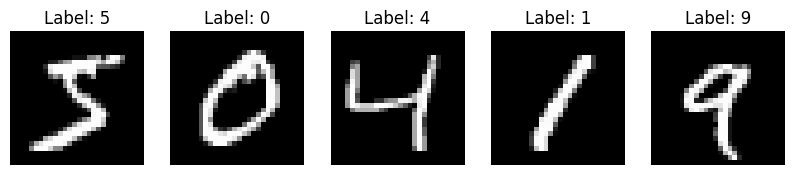

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize images to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode labels
y_train_encoded = to_categorical(y_train, 10)
y_test_encoded = to_categorical(y_test, 10)

# Display 5 sample images
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8710 - loss: 0.4413 - val_accuracy: 0.9630 - val_loss: 0.1256
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9674 - loss: 0.1099 - val_accuracy: 0.9743 - val_loss: 0.0845
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9765 - loss: 0.0760 - val_accuracy: 0.9713 - val_loss: 0.0851
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9837 - loss: 0.0527 - val_accuracy: 0.9753 - val_loss: 0.0819
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9882 - loss: 0.0384 - val_accuracy: 0.9777 - val_loss: 0.0825
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9899 - loss: 0.0318 - val_accuracy: 0.9758 - val_loss: 0.0831
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9918 - loss: 0.0256 - val_accuracy: 0.9803 - val_loss: 0.0906
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9931 - loss: 0.0211

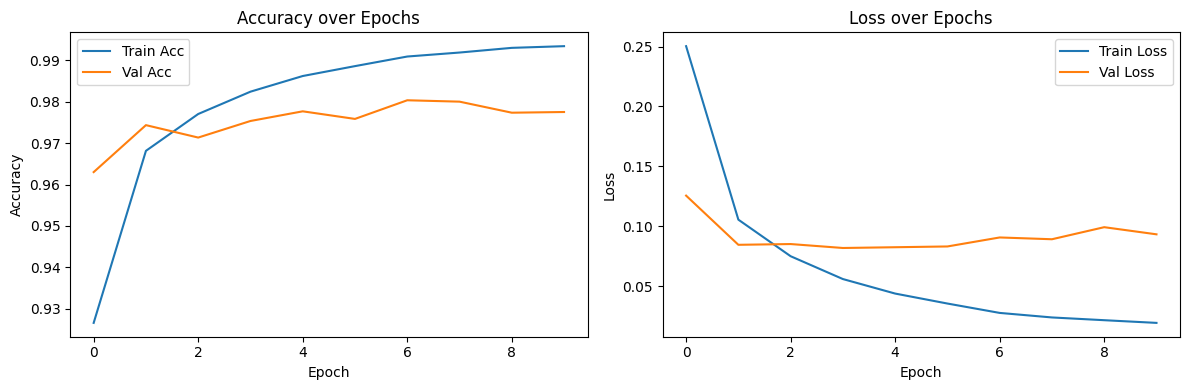

In [3]:
# Train the model with validation split
history = model.fit(
    x_train, y_train_encoded,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)

# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9717 - loss: 0.1169
Test Accuracy: 0.9744
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


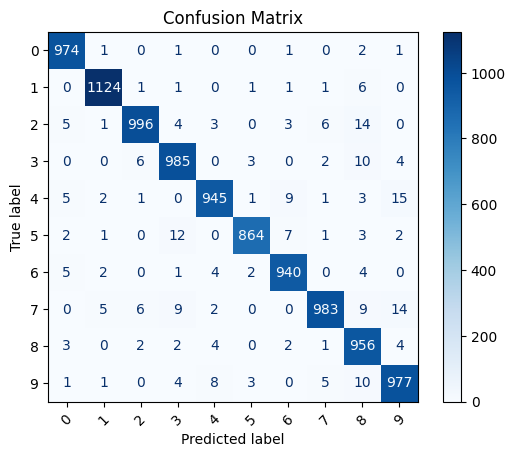

Number of misclassified samples: 256


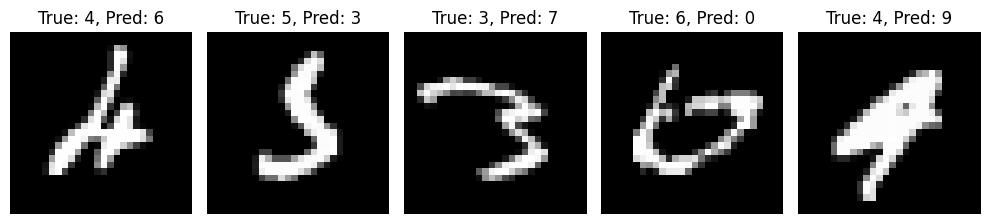

In [4]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict class labels
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

# Identify problematic digits
misclassified = np.where(y_pred != y_test)[0]
print(f"Number of misclassified samples: {len(misclassified)}")

# Show some misclassified digits
plt.figure(figsize=(10, 5))
for i, index in enumerate(misclassified[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[index], cmap='gray')
    plt.title(f"True: {y_test[index]}, Pred: {y_pred[index]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
